<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P7E4_fixearU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

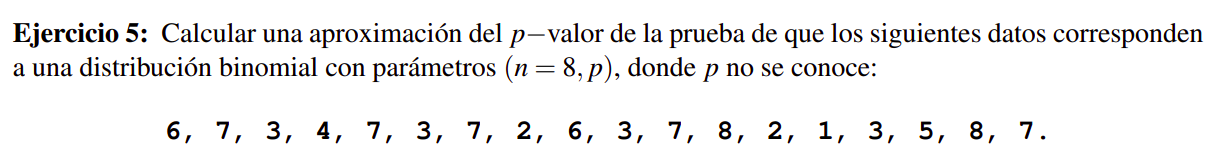

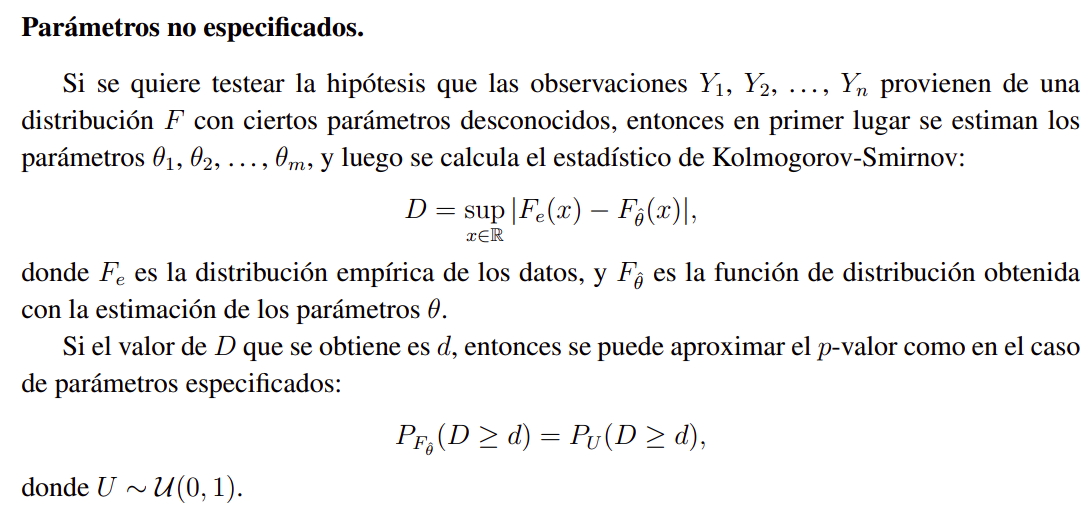

In [45]:
from scipy.stats import chi2
from random import random, seed
import numpy as np
import math

N_SIM = 100_000
MUESTRA_EMPIRICA = sorted([6, 7, 3, 4, 7, 3, 7, 2, 6, 3, 7, 8, 2, 1, 3, 5, 8, 7])
n_PARAMETRO = 8
n_TAMANO_MUESTRA = len(MUESTRA_EMPIRICA)

# estimador P(E) = sum(muestra / n_PARAMETRO) / len(muestra)
def estimador_p(muestra):
    vmuestra = np.asarray(muestra)
    return sum(vmuestra / n_PARAMETRO) / len(vmuestra)

print(f"estimador empirico de p parametro desconocido de la binomial: {estimador_p(MUESTRA_EMPIRICA)}")

estimador empirico de p parametro desconocido de la binomial: 0.6180555555555556


In [46]:
def calcular_estadistico_KS(muestra, fda):
    muestra_ordenada = sorted(muestra)
    D_max = abs(fda(muestra_ordenada[0]) - (1 / n_TAMANO_MUESTRA))

    for j, y in enumerate(muestra_ordenada, start=1):
        F_y = fda(y)
        D_plus = j / n_TAMANO_MUESTRA - F_y
        D_minus = F_y - (j - 1) / n_TAMANO_MUESTRA
        D_max = max(D_max, D_plus, D_minus)

    return D_max

def fpm_Bin(x, p, n=n_PARAMETRO):
    return math.comb(n, x) * p**x * (1 - p)**(n - x)
def calcular_fda_Bin(p):
    probs = [fpm_Bin(x, p) for x in range(n_PARAMETRO + 1)]
    acumulada = np.cumsum(probs)
    return lambda x: acumulada[x]

seed(1)
print(f"estadistico d empirico de Kolmogorov-Smirnov: {calcular_estadistico_KS(MUESTRA_EMPIRICA, calcular_fda_Bin(estimador_p(MUESTRA_EMPIRICA)))}")

estadistico d empirico de Kolmogorov-Smirnov: 0.37344311354803483


In [47]:
def muestreador_binomial(p, n=n_PARAMETRO):
    razon_chances = p / (1 - p) # odds ratio
    prob = (1 - p) ** n # P(X=0)
    Fx = prob
    x = 0
    u = random() # U ~ Uniforme(0, 1)

    while u >= Fx:
        prob *= razon_chances * (n - x) / (x + 1)
        Fx += prob # F(x)
        x += 1

    return x

def estimar_Pvalor_KS_conF(n_sim):
    p_empirico = estimador_p(MUESTRA_EMPIRICA)
    fda_F = calcular_fda_Bin(p_empirico)
    d_empirico = calcular_estadistico_KS(MUESTRA_EMPIRICA, fda_F)
    muestreador_F = lambda: muestreador_binomial(p_empirico)

    cuenta = 0
    for _ in range(n_sim):
        F_muestra = [muestreador_F() for _ in range(n_TAMANO_MUESTRA)]
        d_simulado = calcular_estadistico_KS(F_muestra, fda_F)
        if d_simulado > d_empirico:
            cuenta += 1
    return cuenta / n_sim

seed(1)
p_valor_estimado = estimar_Pvalor_KS_conF(N_SIM)
print(f"P-valor estimado usando F: {p_valor_estimado}")

P-valor estimado usando F: 0.18486


In [56]:
# FIXME: no anda, no da igual.

def fda_U01(x):
    return x
muestreador_U01 = random

def estimar_Pvalor_KS_conU(n_sim):
    p_empirico = estimador_p(MUESTRA_EMPIRICA)
    fda_F = calcular_fda_Bin(p_empirico)
    d_empirico = calcular_estadistico_KS(MUESTRA_EMPIRICA, fda_F)

    cuenta = 0
    for _ in range(n_sim):
        U_muestra = [muestreador_U01() for _ in range(n_TAMANO_MUESTRA)]
        d_simulado = calcular_estadistico_KS(U_muestra, fda_U01)
        if d_simulado > d_empirico:
            cuenta += 1
    return cuenta / n_sim

seed(1)
p_valor_estimado = estimar_Pvalor_KS_conU(N_SIM)
print(f"P-valor estimado usando U: {p_valor_estimado}")

P-valor estimado usando U: 0.00967


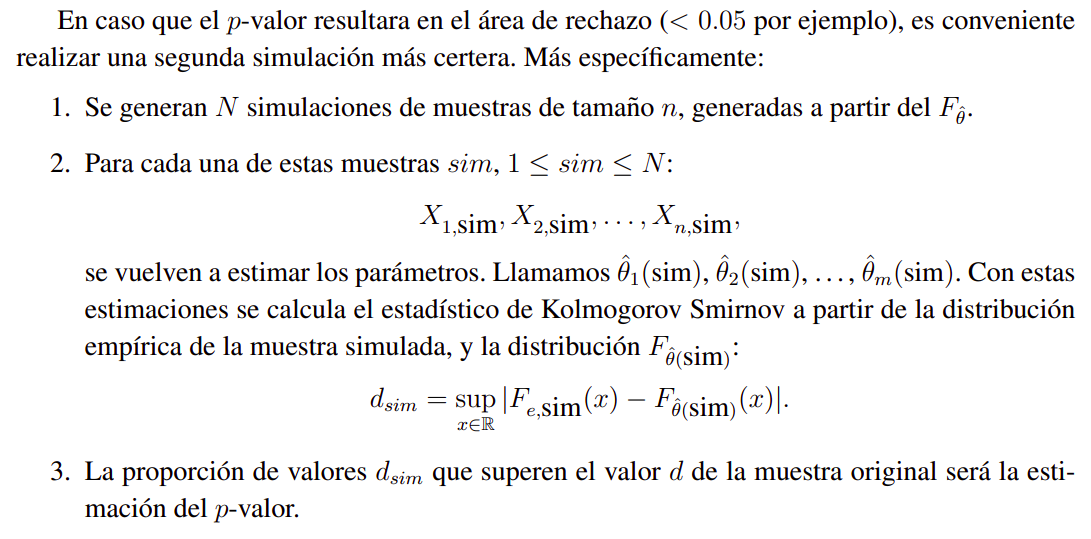

In [48]:
def estimar_Pvalor_KS_conF_exaustivo(n_sim):
    p_empirico = estimador_p(MUESTRA_EMPIRICA)
    fda_F = calcular_fda_Bin(p_empirico)
    d_empirico = calcular_estadistico_KS(MUESTRA_EMPIRICA, fda_F)
    muestreador_F = lambda: muestreador_binomial(p_empirico)

    cuenta = 0
    for _ in range(n_sim):
        F_muestra = [muestreador_F() for _ in range(n_TAMANO_MUESTRA)]

        p_simulada = estimador_p(F_muestra)
        fda_F_simulada = calcular_fda_Bin(p_simulada)

        d_simulado = calcular_estadistico_KS(F_muestra, fda_F_simulada)
        if d_simulado > d_empirico:
            cuenta += 1
    return cuenta / n_sim

seed(1)
p_valor_estimado = estimar_Pvalor_KS_conF(N_SIM)
print(f"P-valor estimado usando F exaustivo: {p_valor_estimado}")

P-valor estimado usando F exaustivo: 0.18486
